<a href="https://colab.research.google.com/github/Thor41414/KomputasiBiomedis2023/blob/main/Tugas_Kombio_1_Muhammad_Hafizh_Athari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pilih jenis regresi:
1. Regresi Linier y = a + bx
2. Regresi Linier y = ax^b
3. Regresi Eksponensial y = ae^-bx
Masukkan nomor jenis regresi yang ingin digunakan: 3
Masukkan nilai x (dipisahkan dengan spasi): 0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 5.5
Masukkan nilai y (dipisahkan dengan spasi): 1 0.994 0.99 0.985 0.979 0.977 0.972 0.969 0.967 0.960 0.956 0.952


<ipython-input-3-e2e066fe5f73>:60: RuntimeWarning: divide by zero encountered in log
  data = {'x': x, 'y': y, 'X': np.log(x), 'Y': np.log(y), 'X^2': (np.log(x))**2, 'Y^2': (np.log(y))**2}



Tabel:
      x      y         X         Y       X^2       Y^2
0   0.0  1.000      -inf  0.000000       inf  0.000000
1   0.5  0.994 -0.693147 -0.006018  0.480453  0.000036
2   1.0  0.990  0.000000 -0.010050  0.000000  0.000101
3   1.5  0.985  0.405465 -0.015114  0.164402  0.000228
4   2.0  0.979  0.693147 -0.021224  0.480453  0.000450
5   2.5  0.977  0.916291 -0.023269  0.839589  0.000541
6   3.0  0.972  1.098612 -0.028399  1.206949  0.000807
7   3.5  0.969  1.252763 -0.031491  1.569415  0.000992
8   4.0  0.967  1.386294 -0.033557  1.921812  0.001126
9   4.5  0.960  1.504077 -0.040822  2.262249  0.001666
10  5.0  0.956  1.609438 -0.044997  2.590290  0.002025
11  5.5  0.952  1.704748 -0.049190  2.906166  0.002420
Nilai a: -0.0015854749179831755
Nilai b: -0.008639549701453635
Nilai S: 1.623955062084946e-05


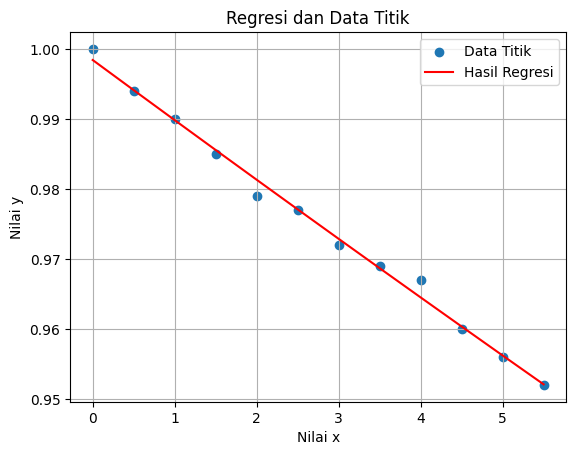

Soal nomor 3 memiliki Regresi  ln(y(t)) = -0.0015854749179831755 - (-0.008639549701453635)t 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linear_regression(x, y):
    xy = x * y
    x_squared = x ** 2
    y_squared = y ** 2
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    b = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) ** 2)
    a = mean_y - b * mean_x
    si = (y - a - b * x) ** 2
    S = np.sum(si)
    return a, b, S

def exponential_regression(x, y):
    X = np.log(x)
    Y = np.log(y)
    XY = X * Y
    X_squared = X ** 2
    Y_squared = Y ** 2
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    b = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X) ** 2)
    A = mean_Y - b * mean_X
    a = np.exp(A)
    si = (Y - A - b * X) ** 2
    S = np.sum(si)
    return a, b, A, S

def main():
    print("Pilih jenis regresi:")
    print("1. Regresi Linier y = a + bx")
    print("2. Regresi Linier y = ax^b")
    print("3. Regresi Eksponensial y = ae^-bx")

    choice = int(input("Masukkan nomor jenis regresi yang ingin digunakan: "))
    data_input_x = input("Masukkan nilai x (dipisahkan dengan spasi): ")
    data_input_y = input("Masukkan nilai y (dipisahkan dengan spasi): ")
    x = np.array([float(val) for val in data_input_x.split()])
    y = np.array([float(val) for val in data_input_y.split()])
    n = len(x)
    if choice == 1:
        a, b, S = linear_regression(x, y)
        formula = f"y = {a} + {b}x"
        A = None
    elif choice == 2:
        a, b, A, S = exponential_regression(x, y)
        formula = f"ln(f(x)) = {A} + {b}x"
    elif choice == 3:
        a, b, S = linear_regression(x, np.log(y))
        formula = f"ln(y(t)) = {a} - ({b})t"
        A = None
    else:
        print("Pilihan tidak valid.")
        return

    # buat tabel
    data = {'x': x, 'y': y, 'X': np.log(x), 'Y': np.log(y), 'X^2': (np.log(x))**2, 'Y^2': (np.log(y))**2}
    df = pd.DataFrame(data)
    print("\nTabel:")
    print(df)

    print("Nilai a:", a)
    if A is not None:
        print("Nilai A:", A)
    print("Nilai b:", b)
    print("Nilai S:", S)

   #buat grafik
    plt.scatter(x, y, label="Data Titik")

    if choice == 1:
        regression_line = a + b * x
    elif choice == 2:
        regression_line = a * x**b
    elif choice == 3:
        regression_line = np.exp(a + b * x)

    plt.plot(x, regression_line, color='red', label="Hasil Regresi")

    plt.xlabel("Nilai x")
    plt.ylabel("Nilai y")
    plt.title("Regresi dan Data Titik")
    plt.legend()
    plt.grid(True)

    plt.show()

    print(f"Soal nomor {choice} memiliki Regresi  {formula} ")
if __name__ == "__main__":
    main()
